In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('orgs.csv')

In [3]:
df["region"].unique()

array(['AP', 'LC', 'EE', 'WE', 'ME', nan, 'EU', 'AF'], dtype=object)

In [6]:
df[df["region"].isnull()]['raw_country'].unique()

array(['United States', 'Canada'], dtype=object)

In [7]:
# nan variables were associated with North America.
df["region"] = df["region"].fillna("NAM")

In [21]:
# Combine Middle-East and Africa to have the same locations as the NewZoo Dataset
df["region"] = df["region"].replace(to_replace="AF", value="MEA")
df["region"] = df["region"].replace(to_replace="ME", value="MEA")
df["region"].unique()

array(['AP', 'LC', 'EE', 'WE', 'MEA', 'NAM', 'EU'], dtype=object)

In [22]:
df.head()

,Unnamed: 0,org,org_ipsize_seen,caida_type,as_type,raw_country,region,count_attack_2014,count_attack_2015,count_attack,count_attack_norm,ITU-ICT,Population,revenues
0,0,"#3BEo, Sangkat Beoun Prolit, Khan 7Makara, Phn...",38.0,Transit/Access,Unknown,Cambodia,AP,0.0,9.0,9.0,0.236842,2.8,15766.29,10.0
1,1,& Aguiar Ltda Me,10.0,Transit/Access,Unknown,Brazil,LC,1.0,2.0,3.0,0.300000,5.7,206163.06,NaN
2,2,& Dantas Ltda,40.0,Transit/Access,Unknown,Brazil,LC,3.0,0.0,3.0,0.075000,5.7,206163.06,NaN
3,3,& Matera Ltda,9.0,Transit/Access,Unknown,Brazil,LC,0.0,6.0,6.0,0.666667,5.7,206163.06,NaN
4,4,& Rapchan Ltda. - Me,37.0,Transit/Access,Unknown,Brazil,LC,5.0,15.0,20.0,0.540541,5.7,206163.06,NaN


In [47]:
# Make the values per region
df_region = df.groupby("region")["count_attack"].sum()
df_region = pd.DataFrame(df_region)
df_region["ITU-ICT"] = df.groupby("region")["ITU-ICT"].mean()
df_region = df_region.reset_index()

In [50]:
# Adding the data from https://newzoo.com/insights/articles/newzoos-top-100-countries-by-2015-game-revenues/
# Revenues is in billion USA dollars. 

#Asia Pacific
df_region.loc[df_region["region"] == "AP", 'revenues'] = 43.1
df_region.loc[df_region["region"] == "AP", 'online_pop'] = 1492370000
df_region.loc[df_region["region"] == "AP", 'gamers'] = 1002401000

#North America
df_region.loc[df_region["region"] == "NAM", 'revenues'] = 23.8
df_region.loc[df_region["region"] == "NAM", 'online_pop'] = 322144000
df_region.loc[df_region["region"] == "NAM", 'gamers'] = 208573000

#Eastern Europe
df_region.loc[df_region["region"] == "EE", 'revenues'] = 2.8
df_region.loc[df_region["region"] == "EE", 'online_pop'] = 234888000
df_region.loc[df_region["region"] == "EE", 'gamers'] = 138260000

#Western Europe
df_region.loc[df_region["region"] == "WE", 'revenues'] = 15.6
df_region.loc[df_region["region"] == "WE", 'online_pop'] = 341861000
df_region.loc[df_region["region"] == "WE", 'gamers'] = 195514000

#Latin
df_region.loc[df_region["region"] == "LC", 'revenues'] = 4
df_region.loc[df_region["region"] == "LC", 'online_pop'] = 333094000
df_region.loc[df_region["region"] == "LC", 'gamers'] = 189091000

#Middle East and Africa
df_region.loc[df_region["region"] == "MEA", 'revenues'] = 2.1
df_region.loc[df_region["region"] == "MEA", 'online_pop'] = 456689000
df_region.loc[df_region["region"] == "MEA", 'gamers'] = 250962000

In [54]:
#Remove EU as they are already taken into account with WE and EE
df_region = df_region.drop(2)

In [55]:
df_region

,region,count_attack,ITU-ICT,revenues,online_pop,gamers
0,AP,1601530.0,6.009208,43.1,1.492370e+09,1.002401e+09
1,EE,349087.0,6.411272,2.8,2.348880e+08,1.382600e+08
3,LC,267655.0,5.529465,4.0,3.330940e+08,1.890910e+08
4,MEA,186012.0,5.154703,2.1,4.566890e+08,2.509620e+08
5,NAM,2012268.0,8.054297,23.8,3.221440e+08,2.085730e+08
6,WE,826506.0,8.124830,15.6,3.418610e+08,1.955140e+08


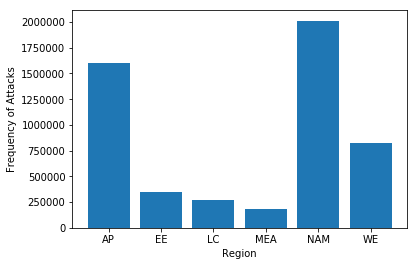

In [93]:
plt.bar(df_region["region"], df_region["count_attack"])
plt.ylabel("Frequency of Attacks")
plt.xlabel("Region")

plt.savefig("ddos_region_attacks.png")

In [109]:
df_region["revenues_normalized"] = (df_region["revenues"]*1000000000) / df_region["gamers"]

In [110]:
df_region

,region,count_attack,ITU-ICT,revenues,online_pop,gamers,revenues_normalized
0,AP,1601530.0,6.009208,43.1,1.492370e+09,1.002401e+09,42.996765
1,EE,349087.0,6.411272,2.8,2.348880e+08,1.382600e+08,20.251700
3,LC,267655.0,5.529465,4.0,3.330940e+08,1.890910e+08,21.153836
4,MEA,186012.0,5.154703,2.1,4.566890e+08,2.509620e+08,8.367801
5,NAM,2012268.0,8.054297,23.8,3.221440e+08,2.085730e+08,114.108729
6,WE,826506.0,8.124830,15.6,3.418610e+08,1.955140e+08,79.789683


C:\Users\newbi\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\newbi\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


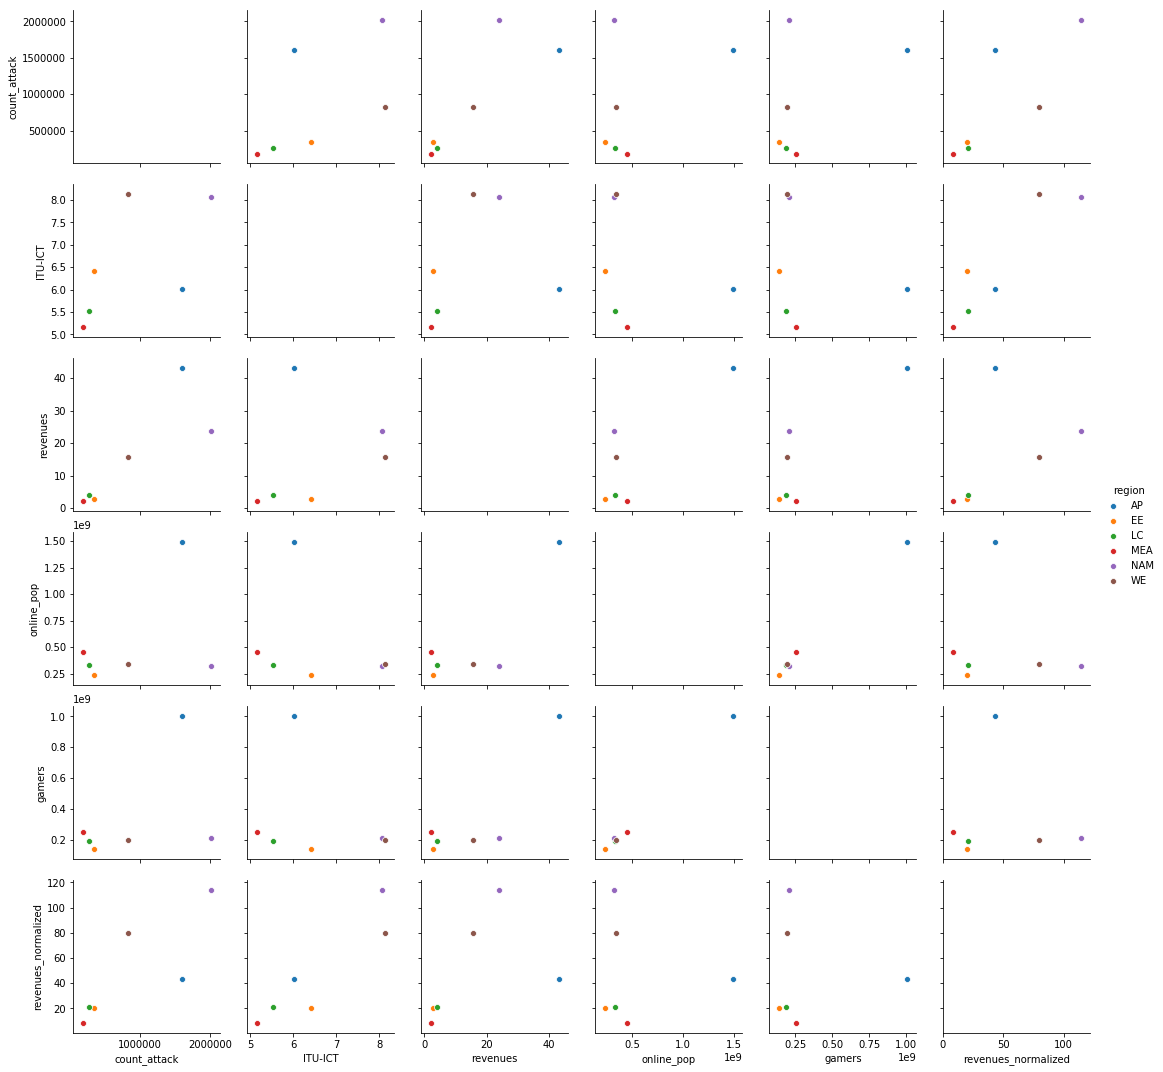

In [112]:
import seaborn as sns

sns.pairplot(df_region, hue = "region")

In [85]:
from scipy.stats import normaltest
from scipy.stats import anderson

ALPHA = 0.05 # 95% confidence

stat, p = normaltest(df_region.count_attack)
print('\nD’Agostino and Pearson’s test if data coming from Gaussian distribution:\n\tStatistics=%.3f, p=%.3f' % (stat, p))
if p > ALPHA:
    print('\tSample looks Gaussian (fail to reject H0)')
else:
    print('\tSample does not look Gaussian (reject H0)')
    
    
stat, c_values, s_levels = anderson(df_region.count_attack); J = 2 # index of critical values and corresponding significance level
print('\nAnderson-Darling test if data coming from Gaussian distribution:\n\tStatistics=%.3f' % stat)
if stat < float(c_values[s_levels / 100 == ALPHA]):
    print('\tsignificance level=%.2f: %.3f, data looks normal (fail to reject H0)' % (ALPHA, float(c_values[s_levels / 100 == ALPHA])))
else:
    print('\tsignificance level=%.2f: %.3f, data does not look normal (reject H0)' % (ALPHA, float(c_values[s_levels / 100 == ALPHA])))

ValueError: skewtest is not valid with less than 8 samples; 6 samples were given.

In [113]:
from scipy.stats import spearmanr

ALPHA = 0.05 # 95% confidence

xs = ["ITU-ICT", "revenues", "online_pop", "gamers", "revenues_normalized"]

for x in xs:
    print('\nTest Spearman rank-order correlation of \"count_attack\" ~ \"%s\"' % x)
    coef, p = spearmanr(df_region[x], df_region["count_attack"], nan_policy='omit')

    print('\tSpearmans correlation coefficient = %.3f' % coef)

    if p > ALPHA:
        print('\tSamples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        print('\tSamples are correlated (reject H0) p=%.3f' % p)


Test Spearman rank-order correlation of "count_attack" ~ "ITU-ICT"
	Spearmans correlation coefficient = 0.714
	Samples are uncorrelated (fail to reject H0) p=0.111

Test Spearman rank-order correlation of "count_attack" ~ "revenues"
	Spearmans correlation coefficient = 0.886
	Samples are correlated (reject H0) p=0.019

Test Spearman rank-order correlation of "count_attack" ~ "online_pop"
	Spearmans correlation coefficient = -0.086
	Samples are uncorrelated (fail to reject H0) p=0.872

Test Spearman rank-order correlation of "count_attack" ~ "gamers"
	Spearmans correlation coefficient = 0.257
	Samples are uncorrelated (fail to reject H0) p=0.623

Test Spearman rank-order correlation of "count_attack" ~ "revenues_normalized"
	Spearmans correlation coefficient = 0.886
	Samples are correlated (reject H0) p=0.019


In [ ]:
# import statsmodels.api as sm # import statsmodels 

# X = df_region[["ITU-ICT", "revenues", "online_pop", "gamers"]] ## X means our input variables (or independent variables)
# y = df_region["count_attack"] ## Y usually means our output/dependent variable

# # Note the difference in argument order
# model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
# predictions = model.predict(X)

# # Print out the statistics
# model.summary()